In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import scipy.stats as st
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn
pd.options.mode.chained_assignment = None  # default='warn'  ###This is to deal with SettingWithCopyWarning
pd.options.display.float_format = '{:.1f}'.format ###This is to be able to sum columns without scientific notations
from scipy.stats import f_oneway as f1, chi2_contingency as chi
from numpy import corrcoef as cce

In [2]:
###Getting Data from CSV File

df = pd.read_csv("Refined Project Data")
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Customer ID,Date,Time,Day,Month,Year,City,State,Amount
0,0,176558,USB-C Charging Cable,2,11.9,75315,2019-04-19,08:46:00,Friday,Apr,2019,Dallas,TX,23.9
1,1,176559,Bose SoundSport Headphones,1,100.0,59963,2019-07-04,22:30:00,Thursday,Jul,2019,Boston,MA,100.0
2,2,176560,Google Phone,1,600.0,25532,2019-12-04,14:38:00,Wednesday,Dec,2019,Los Angeles,CA,600.0
3,3,176560,Wired Headphones,1,12.0,25532,2019-12-04,14:38:00,Wednesday,Dec,2019,Los Angeles,CA,12.0
4,4,176561,Wired Headphones,1,12.0,89128,2019-04-30,09:27:00,Tuesday,Apr,2019,Los Angeles,CA,12.0


In [3]:
###dropping Unnamed: 0 series
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Customer ID,Date,Time,Day,Month,Year,City,State,Amount
0,176558,USB-C Charging Cable,2,11.9,75315,2019-04-19,08:46:00,Friday,Apr,2019,Dallas,TX,23.9
1,176559,Bose SoundSport Headphones,1,100.0,59963,2019-07-04,22:30:00,Thursday,Jul,2019,Boston,MA,100.0
2,176560,Google Phone,1,600.0,25532,2019-12-04,14:38:00,Wednesday,Dec,2019,Los Angeles,CA,600.0
3,176560,Wired Headphones,1,12.0,25532,2019-12-04,14:38:00,Wednesday,Dec,2019,Los Angeles,CA,12.0
4,176561,Wired Headphones,1,12.0,89128,2019-04-30,09:27:00,Tuesday,Apr,2019,Los Angeles,CA,12.0


In [4]:
###Total Sales made
df["Amount"].sum()

35079031.78

In [5]:
###Total Quantity Ordered
df["Quantity Ordered"].sum()

212641

* **Total order received:** 212,641

* **Total sales:** 35079031.78

# Product Analysis

In [6]:
##Getting sales by product
grouped_sales_by_product = pd.DataFrame(df.groupby("Product")["Amount"].sum())
grouped_sales_by_product["Amount"] = grouped_sales_by_product["Amount"].astype(int)
grouped_sales_by_product.sort_values(by= "Amount")

,Amount
Product,
AAA Batteries (4-pack),94110
AA Batteries (4-pack),108445
Wired Headphones,251322
USB-C Charging Cable,290396
Lightning Charging Cable,354509
LG Washing Machine,397800
LG Dryer,403800
20in Monitor,461738
Vareebadd Phone,845600


**Macbook Pro Laptop** is the product with the highest sales while **AAA Batteries (4-pack)** is the product with the least sales.

In [7]:
df["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

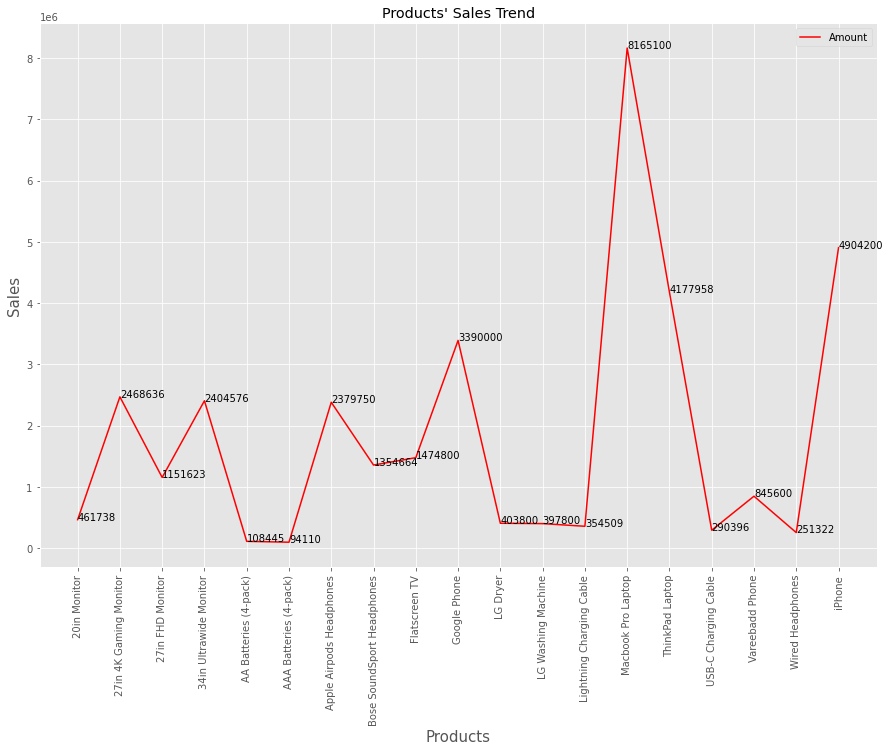

In [8]:
###Plotting graph for products and sales made

# to set the plot size
fig, ax = plt.subplots(figsize=(15, 10))

###to set the number of columns
ind = np.arange(19)
prod= grouped_sales_by_product.groupby("Product")
products = [product for product, df in prod]

grouped_sales_by_product.plot(label='Product Sales Trend', color='red', ax=ax)
  
# adding title to the plot
plt.title("Products' Sales Trend")
  
# adding Label to the x-axis
plt.xlabel("Products", size = 15)
plt.ylabel("Sales",  size = 15)
plt.xticks(ind, products, rotation="vertical")
  
# adding legend to the curve
plt.legend(loc = "best")

for index, value in enumerate(grouped_sales_by_product["Amount"]):
    plt.text(x = index, y = value+10, s = f"{value}")
        
plt.show()

In [9]:
###Getting the total number of orders by product
prod_qty =  pd.DataFrame(df.groupby("Product")["Quantity Ordered"].sum())
prod_qty.sort_values(by= "Quantity Ordered")


,Quantity Ordered
Product,
LG Washing Machine,663
LG Dryer,673
Vareebadd Phone,2114
ThinkPad Laptop,4178
20in Monitor,4198
Macbook Pro Laptop,4803
Flatscreen TV,4916
Google Phone,5650
34in Ultrawide Monitor,6328


AAA Batteries (4-pack) is the most ordered product, LG Washing Machine is the least ordered product.

In [10]:
####Creating a new table that shows the total quantity ordered and total sales made by products
prod_qty_sales = pd.concat([grouped_sales_by_product, prod_qty["Quantity Ordered"]], axis=1)
prod_qty_sales.sort_values(by= "Amount")

,Amount,Quantity Ordered
Product,,
AAA Batteries (4-pack),94110,31475
AA Batteries (4-pack),108445,28241
Wired Headphones,251322,20961
USB-C Charging Cable,290396,24301
Lightning Charging Cable,354509,23713
LG Washing Machine,397800,663
LG Dryer,403800,673
20in Monitor,461738,4198
Vareebadd Phone,845600,2114


* Macbook Pro Laptop though was not the most ordered product, it ended up being the product with the highest sales.

_It is not about quantity, it is more about the value it adds._

In [11]:
prd_amnt = prod_qty_sales["Amount"].astype(int)
prd_qty_ord = prod_qty_sales["Quantity Ordered"].astype(int)

<ipython-input-12-0a996f8b4c71>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size = 15)
No handles with labels found to put in legend.


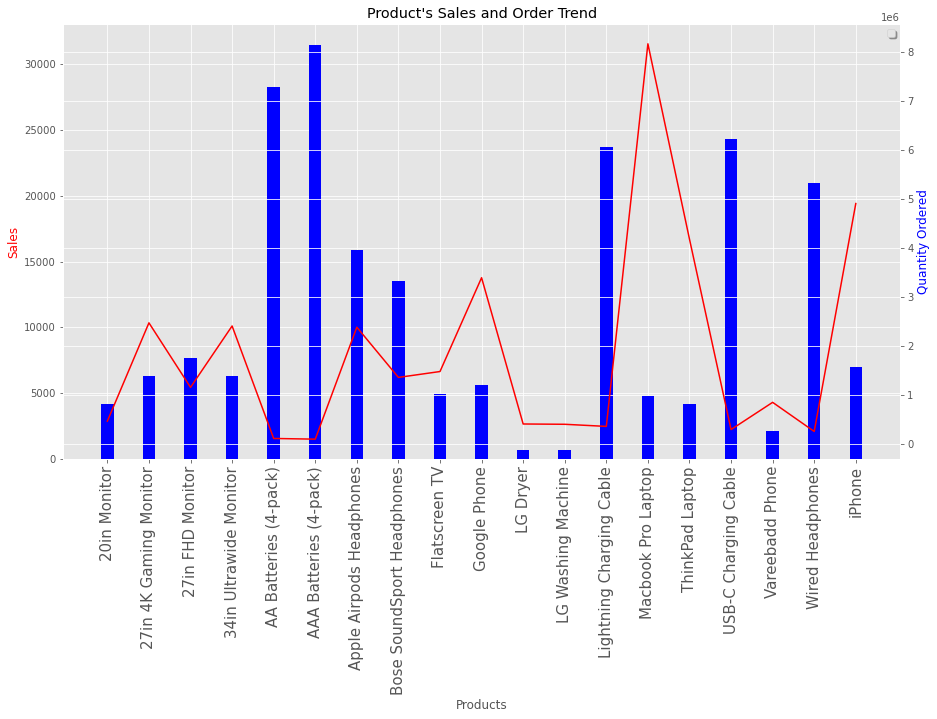

In [12]:
##Bar Chart showing products and total quantity ordered
# to set the plot size
fig, ax1 = plt.subplots(figsize=(15, 8))

ax2 = ax1.twinx()

###to set the number of columns
w= 0.3
prod= prod_qty_sales.groupby("Product")
products = [product for product, data in prod]

# using plot and bar method to plot the total sales and quantity ordered by products.
ax1.bar(products, prd_qty_ord, width=w, color = "blue")
ax2.plot(prd_amnt, color='red') 

# adding title to the plot
plt.title("Product's Sales and Order Trend")

# adding Label to the x-axis
ax1.set_xlabel("Products")
ax1.set_ylabel("Sales", color= "red")
ax2.set_ylabel("Quantity Ordered", color="blue")
ax1.set_xticklabels(products, rotation="vertical", size = 15)
  
# adding legend to the curve
plt.legend(loc = "best", shadow = True)

    
plt.show()

# Finding the peak period with respect to sales and orders received

Weekdays, Month and Year....

In [13]:
##DAY
###Sales made on weekdays
sales_by_day= pd.DataFrame(df.groupby("Day")["Amount"].sum())
sales_by_day["Amount"] =sales_by_day["Amount"].astype(int)

####orders received on weekdays
qty_by_day=pd.DataFrame(df.groupby("Day")["Quantity Ordered"].sum())
qty_by_day["Quantity Ordered"] =qty_by_day["Quantity Ordered"].astype(int)
sales_by_day, qty_by_day

(            Amount
 Day               
 Friday     4973282
 Monday     5291604
 Saturday   4918675
 Sunday     4798665
 Thursday   4964199
 Tuesday    5195655
 Wednesday  4936950,
            Quantity Ordered
 Day                        
 Friday                29921
 Monday                32044
 Saturday              30258
 Sunday                29339
 Thursday              30166
 Tuesday               31241
 Wednesday             29672)

In [14]:
df["Day"].unique()

array(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Saturday'], dtype=object)

In [15]:
##arranging days in the right order for sales
by_day= pd.DataFrame(sales_by_day)

day_order =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
##to reset index
by_day = by_day.reset_index(drop=False)

# to add new day index
by_day.index = pd.Categorical(by_day["Day"], categories=day_order, ordered=True)

# to sort with the day index
by_day = by_day.sort_index().reset_index(drop = True)
by_day

,Day,Amount
0,Monday,5291604
1,Tuesday,5195655
2,Wednesday,4936950
3,Thursday,4964199
4,Friday,4973282
5,Saturday,4918675
6,Sunday,4798665


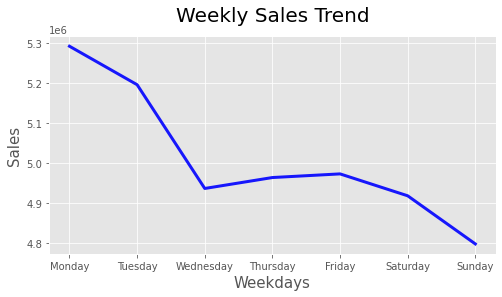

In [16]:
###Plotting graph for Weekly Sales trend 

plt.figure(figsize = (8, 4))
plt.plot(by_day["Day"], by_day["Amount"], linewidth = 3, alpha = 0.9, color = "blue")

plt.title("Weekly Sales Trend", fontsize = 20, pad = 15)
plt.xlabel("Weekdays", size = 15)
plt.ylabel("Sales", size = 15)

plt.show()

* Highest sales were made on Monday, while Sunday has the lowest sales.


In [17]:
##arranging the day in the right order for Quantity Ordered
by_day2= pd.DataFrame(qty_by_day)

day_order2 =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
##to reset index
by_day2 = by_day2.reset_index(drop=False)

# to add new day index
by_day2.index = pd.Categorical(by_day2["Day"], categories=day_order2, ordered=True)

# to sort with the day index
by_day2 = by_day2.sort_index().reset_index(drop = True)
by_day2

,Day,Quantity Ordered
0,Monday,32044
1,Tuesday,31241
2,Wednesday,29672
3,Thursday,30166
4,Friday,29921
5,Saturday,30258
6,Sunday,29339


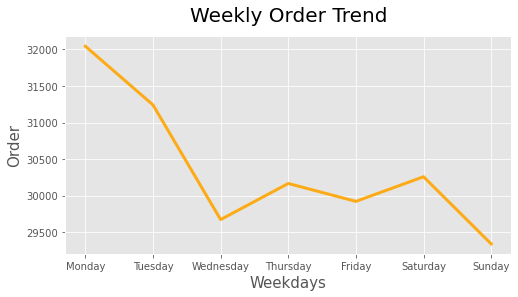

In [18]:
###Plotting graph for Weekly Order trend 

plt.figure(figsize = (8, 4))
plt.plot(by_day2["Day"], by_day2["Quantity Ordered"], linewidth = 3, alpha = 0.9, color = "orange")

plt.title("Weekly Order Trend", fontsize = 20, pad = 15)
plt.xlabel("Weekdays", size = 15)
plt.ylabel("Order", size = 15)

plt.show()

<ipython-input-19-07518f7ced46>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(days, size = 15)


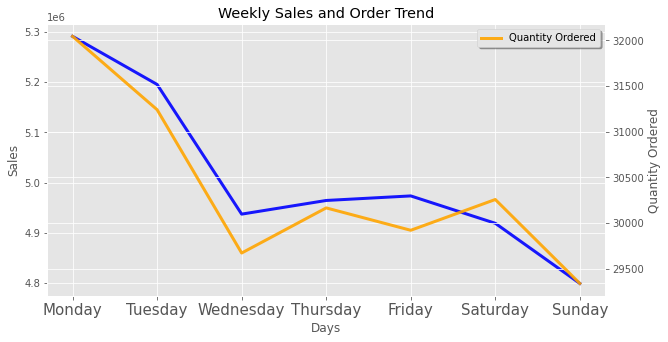

In [19]:
###Plotting graph for Weekly Sales and Order trend 

fig, ax1 = plt.subplots(figsize=(10, 5))
days= ['0','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax2 = ax1.twinx()

ax1.plot(by_day["Amount"], label= "Sales", linewidth = 3, alpha = 0.9, color = "blue") 
ax2.plot(by_day2["Quantity Ordered"], label= "Quantity Ordered", linewidth = 3, alpha = 0.9, color = "orange")

# # adding title to the plot

plt.title("Weekly Sales and Order Trend")

# adding Label to the x-axis
ax1.set_xlabel("Days")
ax1.set_ylabel("Sales")
ax2.set_ylabel("Quantity Ordered")
ax1.set_xticklabels(days, size = 15)
  
# adding legend to the curve
plt.legend(loc = "best", shadow = True)


plt.show()

* **Monday** has the highest sales and order, while **Sunday** has the lowest. This means that customers do not really orders on SUndays, they prefer to rest on Sundays

In [20]:
###Grouping sales by month
grouped_sales_by_month = pd.DataFrame(df.groupby("Month")["Amount"].sum())
grouped_sales_by_month.sort_values(by= "Amount")

,Amount
Month,
Mar,1102525.9
Jan,2312085.9
Feb,2406653.9
Sep,2431391.7
Aug,2450111.6
Jun,2708235.3
Jul,2730149.8
May,3047079.2
Nov,3110722.4


In [21]:
##arranging the month in the right order
by_month= pd.DataFrame(grouped_sales_by_month)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"]

##to reset index
by_month = by_month.reset_index(drop=False)

# to add new month index
by_month.index = pd.Categorical(by_month["Month"], categories=month_order, ordered=True)

# to sort with the month index
by_month = by_month.sort_index().reset_index(drop = True)

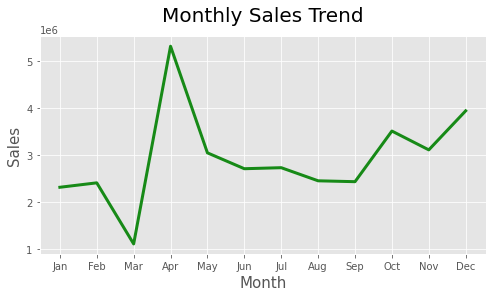

In [22]:
###Plotting graph for Monthly Sales trend 

plt.figure(figsize = (8, 4))
plt.plot(by_month["Month"], by_month["Amount"], linewidth = 3, alpha = 0.9, color = "green")

plt.title("Monthly Sales Trend", fontsize = 20, pad = 15)
plt.xlabel("Month", size = 15)
plt.ylabel("Sales", size = 15)

plt.show()

* **April** has the highest sales while **March** has the lowest sales made.

**_Finding the month trend with respect to Orders received._**

In [23]:
###Grouping period based on quantity ordered
group_period_by_qty = pd.DataFrame(df.groupby("Month")["Quantity Ordered"].sum())
group_period_by_qty.sort_values(by= "Quantity Ordered")

,Quantity Ordered
Month,
Mar,6680
Jan,13778
Feb,14817
Sep,14842
Aug,15231
Jun,16074
Jul,16695
May,18436
Nov,18733


In [24]:
##arranging the month in the right order
qty_month= pd.DataFrame(group_period_by_qty)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

##to reset index
qty_month = qty_month.reset_index(drop=False)

# to add new month index
qty_month.index = pd.Categorical(qty_month["Month"], categories=month_order, ordered=True)

# to sort with the month index
qty_month = qty_month.sort_index().reset_index(drop = True)

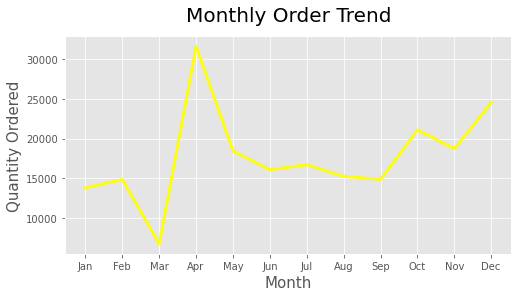

In [25]:
###Plotting graph for Monthly Order Trend

plt.figure(figsize = (8, 4))
plt.plot(qty_month["Month"], qty_month["Quantity Ordered"], linewidth = 3, alpha = 0.9, color = "yellow")

plt.title("Monthly Order Trend", fontsize = 20, pad = 15)
plt.xlabel("Month", size = 15)
plt.ylabel("Quantity Ordered", size = 15)

plt.show()

April has the highest number of quantity ordered while March has the lowest quantity ordered.

In [26]:
###To form a new table that has the Months, total sales made and orders
sales_qty_by_month = pd.concat([by_month, qty_month["Quantity Ordered"]], axis=1)
sales_qty_by_month

,Month,Amount,Quantity Ordered
0,Jan,2312085.9,13778
1,Feb,2406653.9,14817
2,Mar,1102525.9,6680
3,Apr,5323402.7,31675
4,May,3047079.2,18436
5,Jun,2708235.3,16074
6,Jul,2730149.8,16695
7,Aug,2450111.6,15231
8,Sep,2431391.7,14842
9,Oct,3512491.7,21102


In [27]:
amt = sales_qty_by_month["Amount"].astype(int)
qty_ord = sales_qty_by_month["Quantity Ordered"]

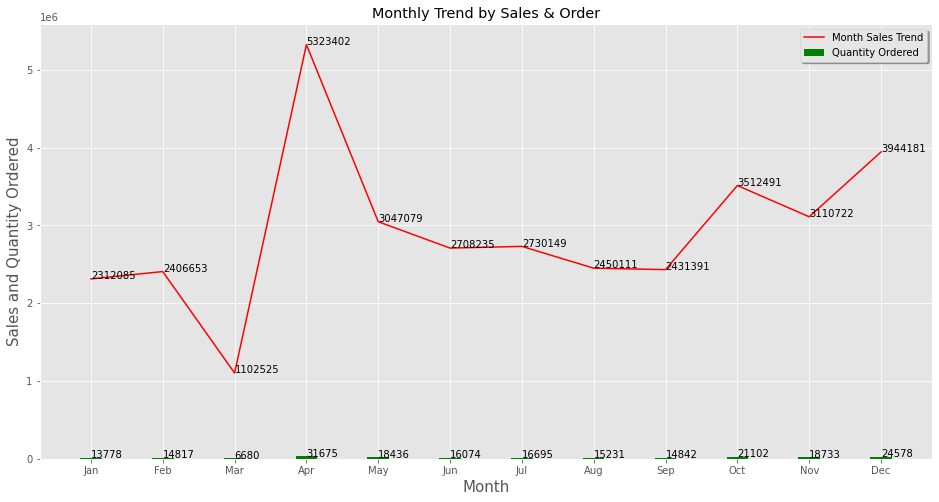

In [28]:
# to set the plot size
plt.figure(figsize=(16, 8))

ncol = np.arange(12)
columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# using plot method to plot peak period.
amt.plot(label='Month Sales Trend', color='red')
plt.bar(ncol, qty_ord, width = w, color = "green", label = "Quantity Ordered")

# adding title to the plot
plt.title('Monthly Trend by Sales & Order')
  
# adding Label to the x-axis
plt.xlabel("Month", size = 15)
plt.ylabel("Sales and Quantity Ordered",  size = 15)
plt.xticks(ncol, columns)
  
# adding legend to the curve
plt.legend(loc = "best", shadow = True)

for index, value in enumerate(amt):
    plt.text(x = index, y = value + 5, s = f"{value}")
    

for index, value in enumerate(qty_ord):
    plt.text(x = index, y = value + 3, s = f"{value}")
    
plt.show()

* **April** has the highest number of quantity ordered as well as sales, while **March** has the lowest sales and quantity ordered.



* _This is likely to be because the firm took some steps around late March and early April due to the low sales made in March, and those steps were taken quickly at the start of April which radically impacted the sales made in the month of April._


In [29]:
###Finding sales made on each products by month
sales_prod_month =pd.DataFrame(df.groupby([df["Month"], df["Product"]])["Amount"].sum()).reset_index()
sales_prod_month

,Month,Product,Amount
0,Apr,20in Monitor,67973.8
1,Apr,27in 4K Gaming Monitor,358790.8
2,Apr,27in FHD Monitor,171288.6
3,Apr,34in Ultrawide Monitor,373150.2
4,Apr,AA Batteries (4-pack),16757.8
...,...,...,...
223,Sep,ThinkPad Laptop,288997.1
224,Sep,USB-C Charging Cable,20721.3
225,Sep,Vareebadd Phone,54800.0
226,Sep,Wired Headphones,18116.9


In [30]:
###Getting a break down of the sales made on each product in April (the month with the highest sales)

Highest_sales_month = sales_prod_month[sales_prod_month["Month"].isin(["Apr"])]
Highest_sales_month.sort_values(by= "Amount")


,Month,Product,Amount
5,Apr,AAA Batteries (4-pack),13924.4
4,Apr,AA Batteries (4-pack),16757.8
17,Apr,Wired Headphones,36533.5
15,Apr,USB-C Charging Cable,40606.1
12,Apr,Lightning Charging Cable,54403.0
11,Apr,LG Washing Machine,57600.0
0,Apr,20in Monitor,67973.8
10,Apr,LG Dryer,74400.0
16,Apr,Vareebadd Phone,132000.0
2,Apr,27in FHD Monitor,171288.6


In [31]:
###Getting a break down of the sales made on each product in March (The month with the lowest sales)

lowest_sales_month = sales_prod_month[sales_prod_month["Month"].isin(["Mar"])]
lowest_sales_month.sort_values(by= "Amount")

,Month,Product,Amount
138,Mar,AAA Batteries (4-pack),2762.8
137,Mar,AA Batteries (4-pack),3275.5
150,Mar,Wired Headphones,7889.4
148,Mar,USB-C Charging Cable,9440.5
143,Mar,LG Dryer,10200.0
145,Mar,Lightning Charging Cable,11571.3
144,Mar,LG Washing Machine,13200.0
133,Mar,20in Monitor,14408.7
149,Mar,Vareebadd Phone,27200.0
135,Mar,27in FHD Monitor,38847.4


# To know each year's trend

In [32]:
sales_by_year= pd.DataFrame(df.groupby("Year")["Amount"].sum())
sales_by_year["Amount"] =sales_by_year["Amount"].astype(int)
sales_by_year

,Amount
Year,
2019,35070361
2020,8670


In [33]:
ord_by_year = pd.DataFrame(df.groupby("Year")["Quantity Ordered"].sum())
ord_by_year["Quantity Ordered"] = ord_by_year["Quantity Ordered"].astype(int)
ord_by_year

,Quantity Ordered
Year,
2019,212600
2020,41


In [34]:
###To form a new table that has the 
ord_sales_by_year = pd.concat([sales_by_year, ord_by_year["Quantity Ordered"]], axis=1)
ord_sales_by_year

,Amount,Quantity Ordered
Year,,
2019,35070361,212600
2020,8670,41


In [35]:
###Plotting sales and order trend by year

In [36]:
year_sales = ord_sales_by_year["Amount"]
year_ord = ord_sales_by_year["Quantity Ordered"]


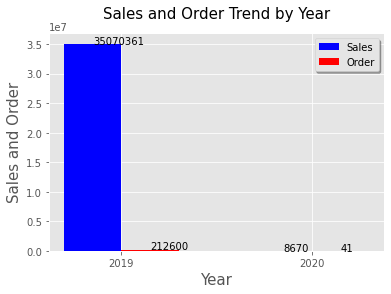

In [37]:
ind = np.arange(2)
w = 0.3

plt.bar(ind, year_sales, width = w, color = "blue", label = "Sales")
plt.bar(ind + w, year_ord, width = w, color = "red", label = "Order")
plt.title("Sales and Order Trend by Year", fontsize = 15, pad = 15)
plt.xlabel("Year", size = 15)
plt.ylabel("Sales and Order", size = 15)
plt.legend(loc = "best", shadow = True)
plt.xticks(ind + w/2, ["2019", "2020"])
for index, value in enumerate(year_sales):
    plt.text(x = index, y = value + 10, s = f"{value}")
for index, value in enumerate(year_ord):
    plt.text(x = index+w, y = value +10, s = f"{value}")

plt.show()

* There was a drastic decrease in sales and order between year 2019 and 2020, this is likely to be because of COVID19 pandemic.



* Most persons were on survival mode, the customers did not even have the money to buy the products. The lockdown could also be another factor because, there was no movement. Everyone had to stay indoors.

# Sales and Order by City Analysis

In [38]:
###Finding sales made with respect to states
group_sales_by_states = pd.DataFrame(df.groupby("State")["Amount"].sum())
group_sales_by_states["Amount"] = group_sales_by_states["Amount"].astype(int)
group_sales_by_states.sort_values(by = "Amount")

,Amount
State,
ME,461778
OR,1913025
WA,2804253
GA,2848142
MA,3714458
TX,4635558
NY,4740706
CA,13961108


In [39]:
###Finding the sales made with respect to cities
group_sales_by_city = pd.DataFrame(df.groupby("City")["Amount"].sum()).reset_index()
group_sales_by_city["Amount"] = group_sales_by_city["Amount"].astype(int)
group_sales_by_city.sort_values(by = "Amount")

,City,Amount
1,Austin,1837719
6,Portland,2374803
3,Dallas,2797839
8,Seattle,2804253
0,Atlanta,2848142
2,Boston,3714458
5,New York City,4740706
4,Los Angeles,5573987
7,San Francisco,8387121


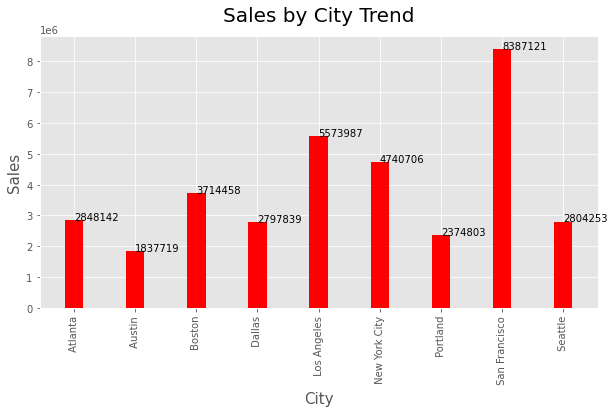

In [40]:
###Plotting a graph for sales by city

plt.figure(figsize = (10, 5))

plt.bar(group_sales_by_city["City"], group_sales_by_city["Amount"], width = 0.3, color = "red")

plt.title("Sales by City Trend", fontsize = 20, pad = 15)
plt.xlabel("City", size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation="vertical")
for index, value in enumerate(group_sales_by_city["Amount"]):
    plt.text(x = index, y = value + 10, s = f"{value}")

plt.show()


In [41]:
###Getting orders by City
qty_by_city = pd.DataFrame(df.groupby("City")["Quantity Ordered"].sum()).reset_index()
qty_by_city.sort_values(by = "Quantity Ordered")

,City,Quantity Ordered
1,Austin,11294
6,Portland,14337
8,Seattle,16828
0,Atlanta,16850
3,Dallas,16899
2,Boston,22834
5,New York City,28458
4,Los Angeles,33933
7,San Francisco,51208


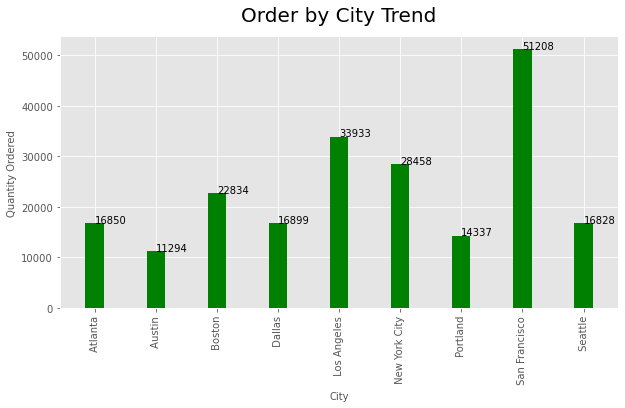

In [42]:
###Plotting a graph for orders by city
plt.figure(figsize = (10, 5))

plt.bar(qty_by_city["City"], qty_by_city["Quantity Ordered"], width = 0.3, color = "green")

plt.title("Order by City Trend", fontsize = 20, pad = 15)
plt.xlabel("City", size = 10)
plt.ylabel("Quantity Ordered", size = 10)
plt.xticks(rotation="vertical")
for index, value in enumerate(qty_by_city["Quantity Ordered"]):
    plt.text(x = index, y = value + 10, s = f"{value}")

plt.show()

In [43]:
###To form a new table that has the City, sales and orders series
qty_sales_by_city = pd.concat([group_sales_by_city, qty_by_city["Quantity Ordered"]], axis=1)
qty_sales_by_city.sort_values(by= "Amount")

,City,Amount,Quantity Ordered
1,Austin,1837719,11294
6,Portland,2374803,14337
3,Dallas,2797839,16899
8,Seattle,2804253,16828
0,Atlanta,2848142,16850
2,Boston,3714458,22834
5,New York City,4740706,28458
4,Los Angeles,5573987,33933
7,San Francisco,8387121,51208


In [44]:
sales = qty_sales_by_city["Amount"].astype(int)
qty_ordered = qty_sales_by_city["Quantity Ordered"]

<ipython-input-45-be1c2732c247>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(cities, rotation= "vertical", size = 15)
No handles with labels found to put in legend.


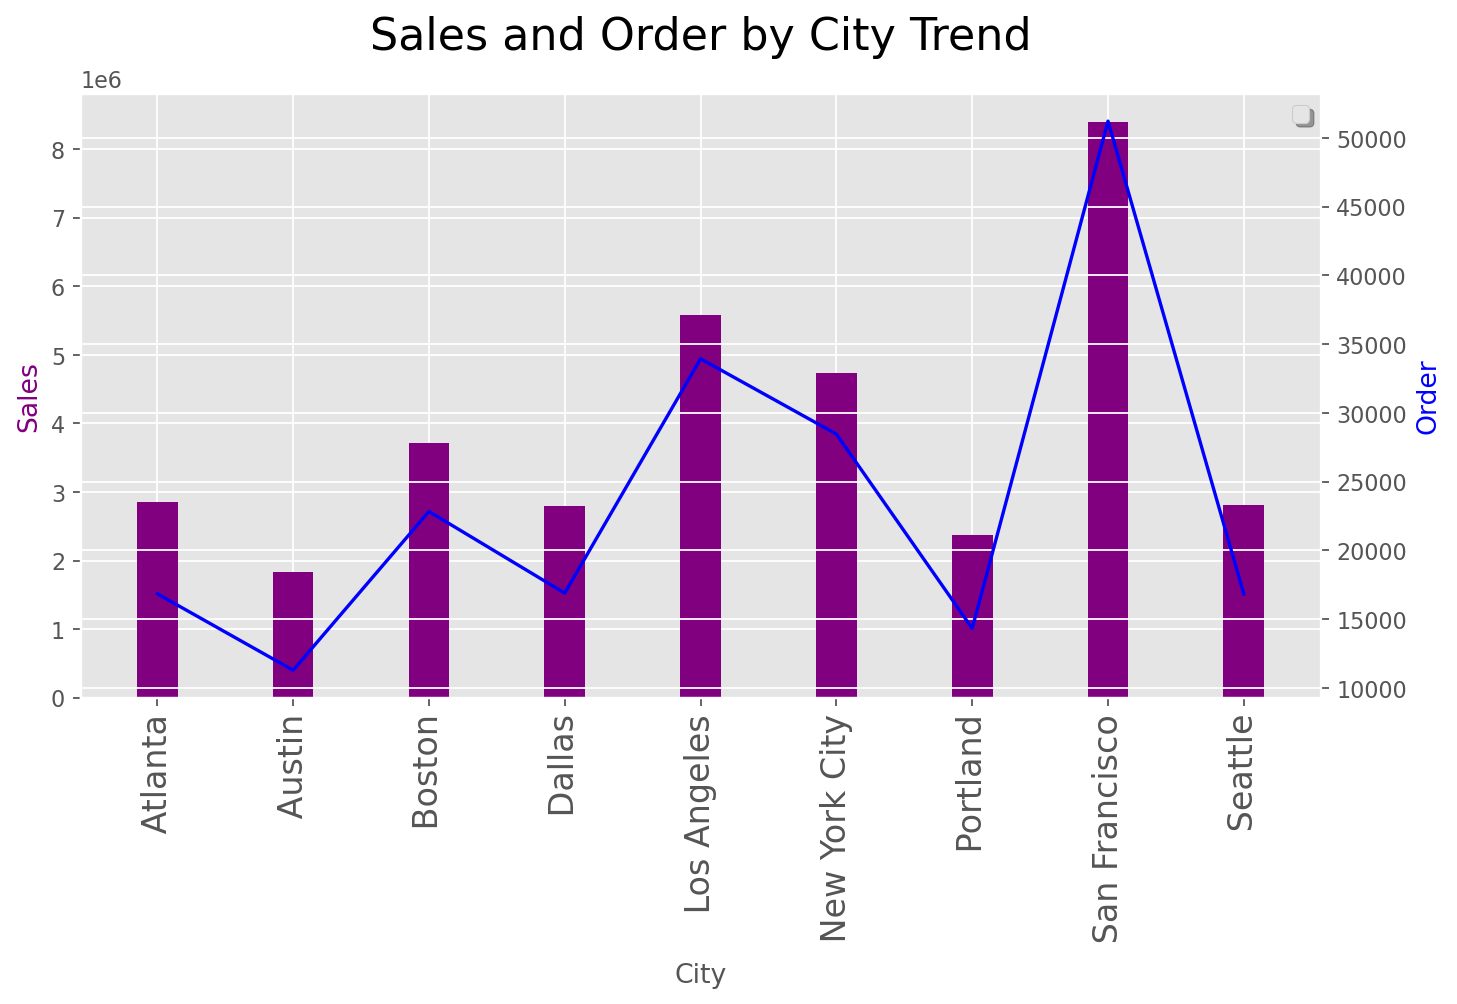

In [45]:
##Bar Chart showing total sales made and quantity ordered by City
fig, ax1 = plt.subplots(figsize = (10, 5), dpi=160)

ax2 = ax1.twinx()

#Setting the number of columns
w = 0.3
city= qty_sales_by_city.groupby("City")
cities = [city for city, ent in city]

###plotting
ax1.bar(cities, sales, width = w, color = "purple")
ax2.plot(qty_ordered, color = "blue")

###Adding title
plt.title("Sales and Order by City Trend", fontsize = 20, pad = 20)

###adding labels
ax1.set_xlabel("City")
ax1.set_ylabel("Sales", color = "purple")
ax2.set_ylabel("Order", color = "blue")
ax1.set_xticklabels(cities, rotation= "vertical", size = 15)
plt.legend(loc = "best", shadow = True)

plt.show()


* San Franscisco has the highest sales and order. Customers from San Franscisco are the richest or the best City to do this kind of business is San Francisco after which Los Angeles can be considered.



# Customer Analysis

Finding most recurring buyers


In [46]:
rec_cust = pd.DataFrame(df.groupby([df["Customer ID"], df["City"]])["Amount"].sum()).reset_index()
rec_cust.sort_values(by = "Amount")

,Customer ID,City,Amount
167388,278483,San Francisco,3.0
110850,156061,Boston,3.0
9407,21623,San Francisco,3.0
110876,156110,San Francisco,3.0
16348,28821,Boston,3.0
...,...,...,...
18815,31384,San Francisco,3400.0
31614,44737,Los Angeles,3400.0
63918,78384,San Francisco,3780.0
54589,68661,San Francisco,3780.0


* The highest spend from a customer is $4,000


* The lowest spend from a customer is $3


* The Customer with the highest spend has the Customer ID **63626**.

In [47]:
###Getting customers with highest spend
most_rec_cust = rec_cust.loc[rec_cust["Amount"] > 3000]
most_rec_cust

,Customer ID,City,Amount
18815,31384,San Francisco,3400.0
24318,37129,Boston,3400.0
31614,44737,Los Angeles,3400.0
49755,63626,San Francisco,4000.0
54589,68661,San Francisco,3780.0
60401,74712,New York City,3400.0
63918,78384,San Francisco,3780.0
68718,83395,New York City,3400.0
98353,128839,Dallas,3400.0
104327,141782,Los Angeles,3400.0


* This also establishes that San Franscisco's customers spend more than other cities

**Finding the customer with the highest order**

In [48]:
rec_cust_ord = pd.DataFrame(df.groupby([df["Customer ID"], df["City"]])["Quantity Ordered"].sum()).reset_index()
rec_cust_ord.sort_values(by = "Quantity Ordered")

,Customer ID,City,Quantity Ordered
88655,107648,Seattle,1
113371,161583,Boston,1
113372,161585,San Francisco,1
113373,161586,San Francisco,1
113374,161587,Los Angeles,1
...,...,...,...
106231,145974,Boston,8
94684,120837,Dallas,8
10464,22720,Los Angeles,9
131932,201719,San Francisco,9


* The highest quantity ordered by each customer is 9.


* The lowest quantity oredred by each customer is 1.


* 2 of 3 Customers with the highest order is also from San Francisco, while the remaining one is from Los Angeles. Another opportunity to establish that San Francisco and Los Angeles contribute more to the company's income than other cities. 

In [49]:
###Getting customers with highest spend
most_rec_cust_ord = rec_cust_ord.loc[rec_cust_ord["Quantity Ordered"] > 7]

most_rec_cust_ord.sort_values(by = "Quantity Ordered")

,Customer ID,City,Quantity Ordered
89679,109977,Seattle,8
94684,120837,Dallas,8
95968,123616,Boston,8
106231,145974,Boston,8
108464,150884,Los Angeles,8
123181,182785,Boston,8
128053,193366,New York City,8
147375,235348,Portland,8
149083,238966,San Francisco,8
10464,22720,Los Angeles,9


# Statistical Analysis

In [50]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Customer ID,Year,Amount
count,189085.0,189085.0,189085.0,189085.0,189085.0,189085.0
mean,230956.6,1.1,184.4,131022.7,2019.0,185.5
std,50073.6,0.4,332.6,84999.7,0.0,333.0
min,141234.0,1.0,3.0,11800.0,2019.0,3.0
25%,188827.0,1.0,11.9,57928.0,2019.0,11.9
50%,228862.0,1.0,14.9,107715.0,2019.0,14.9
75%,274291.0,1.0,150.0,203949.0,2019.0,150.0
max,319670.0,9.0,1700.0,299997.0,2020.0,3400.0


In [51]:
df["Amount"].mean()

185.51990787180256

**Getting average sales and order received by day, month and city**

In [52]:
##Getting average sales made by weekday
av_sales_day = df.groupby("Day")["Amount"].sum().mean()
av_sales_day

5011290.254287496

In [53]:
##Getting average order received by month
av_ord_day = df.groupby("Day")["Quantity Ordered"].sum().mean()
av_ord_day

30377.285714285714

In [54]:
##Getting average sales made by month
av_sales_mnth = df.groupby("Month")["Amount"].sum().mean()
av_sales_mnth

2923252.6483338107

In [55]:
##Getting average order received by month
av_ord_mnth = df.groupby("Month")["Quantity Ordered"].sum().mean()
av_ord_mnth

17720.083333333332

In [56]:
##Getting average sales made by city
av_sales_city = df.groupby("City")["Amount"].sum().mean()
av_sales_city

3897670.197778875

In [57]:
av_ord_city = df.groupby("City")["Quantity Ordered"].sum().mean()
av_ord_city

23626.777777777777

**Hypothesis Testing**



In [58]:
# cross count between 'Day' and 'City State' series
day_city_cross = pd.crosstab(df["Day"], df["City"])
day_city_cross

City,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
Day,,,,,,,,,
Friday,2134,1398,2884,2112,4216,3529,1783,6518,2067
Monday,2293,1529,3027,2275,4644,3727,1969,6818,2219
Saturday,2103,1481,2832,2073,4270,3679,1813,6584,2059
Sunday,2172,1357,2798,2052,4163,3498,1709,6226,2131
Thursday,2098,1487,2881,2111,4255,3691,1781,6431,2140
Tuesday,2195,1425,2994,2219,4418,3728,1897,6611,2254
Wednesday,2113,1361,2788,2126,4209,3477,1767,6384,2102


In [59]:
# testing with Chi Square
chi(day_city_cross)

(45.45869226271459,
 0.5775709421700063,
 48,
 array([[2128.63118703, 1414.29705159, 2846.62857445, 2108.90598408,
         4251.48570749, 3568.71189677, 1792.0346881 , 6420.83534918,
         2109.46956131],
        [2277.24625433, 1513.03931036, 3045.37220827, 2256.14389296,
         4548.3125314 , 3817.86936563, 1917.14953063, 6869.12008885,
         2256.74681757],
        [2148.84603221, 1427.72812227, 2873.66198271, 2128.9335061 ,
         4291.86053891, 3602.60267076, 1809.05299733, 6481.81171431,
         2129.50243541],
        [2085.88438004, 1385.89538038, 2789.46306687, 2066.55529524,
         4166.10809953, 3497.04563556, 1756.04735436, 6291.8932332 ,
         2067.1075548 ],
        [2147.32792131, 1426.71946479, 2871.6318058 , 2127.42946294,
         4288.82843695, 3600.05751382, 1807.77494249, 6477.23246159,
         2127.99799032],
        [2216.52181823, 1472.69301108, 2964.16513208, 2195.98216675,
         4427.02845281, 3716.06308803, 1866.02733691, 6685.94998017,
 

Chi-square value: 45.459

P-value: 0.577

Degrees of freedom: 48

**NOTE:** The null hypothesis is accepted since the p-value is greater than 0.05, there is no relationship between days of the week and the cities that each customer come from.


In [60]:
###Cross count between Cities and Qunatity ordered

city_ord_ct = pd.crosstab(df["City"], df["Quantity Ordered"])
city_ord_ct

Quantity Ordered,1,2,3,4,5,6,7,8,9
City,,,,,,,,,
Atlanta,13791,1011,223,55,22,4,2,0,0
Austin,9081,733,172,37,10,2,3,0,0
Boston,18228,1519,321,95,26,11,3,1,0
Dallas,13518,1106,256,60,15,6,6,1,0
Los Angeles,27337,2193,456,126,46,14,1,1,1
New York City,22983,1774,407,134,19,9,3,0,0
Portland,11496,943,196,63,13,7,0,1,0
San Francisco,41336,3248,705,193,63,20,4,1,2
Seattle,13561,1093,233,54,22,7,2,0,0


In [61]:
chi(city_ord_ct)

(69.76230056617081,
 0.29001847427672633,
 64,
 array([[1.36894452e+04, 1.08824582e+03, 2.37224804e+02, 6.52787688e+01,
         1.88565354e+01, 6.39204591e+00, 1.91761377e+00, 3.99502869e-01,
         2.39701721e-01],
        [9.09548921e+03, 7.23048153e+02, 1.57616003e+02, 4.33722717e+01,
         1.25285877e+01, 4.24697887e+00, 1.27409366e+00, 2.65436179e-01,
         1.59261708e-01],
        [1.83069600e+04, 1.45531629e+03, 3.17241854e+02, 8.72976069e+01,
         2.52169342e+01, 8.54811328e+00, 2.56443398e+00, 5.34257080e-01,
         3.20554248e-01],
        [1.35625904e+04, 1.07816146e+03, 2.35026533e+02, 6.46738557e+01,
         1.86817992e+01, 6.33281329e+00, 1.89984399e+00, 3.95800830e-01,
         2.37480498e-01],
        [2.73417401e+04, 2.17353836e+03, 4.73805828e+02, 1.30380384e+02,
         3.76618981e+01, 1.27667451e+01, 3.83002353e+00, 7.97921570e-01,
         4.78752942e-01],
        [2.29507518e+04, 1.82447566e+03, 3.97714261e+02, 1.09441748e+02,
         3.16135283e

Chi-square value: 69.762

P-value: 0.29

Degrees of freedom: 64

**NOTE:** The null hypothesis is rejected because the p-value is less than 0.05, there is a relationship between days orders received and the city that each customer come from.


In [62]:
# cross count between 'Month' and 'City'
month_city_ct = pd.crosstab(df["Month"], df["City"])
month_city_ct

City,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
Month,,,,,,,,,
Apr,2251,1511,3010,2134,4682,3738,1946,6665,2195
Aug,1087,714,1456,1102,2135,1838,898,3211,1133
Dec,1731,1189,2379,1744,3389,2866,1445,5300,1679
Feb,1056,617,1411,1053,2067,1771,916,3204,1049
Jan,1005,638,1252,1021,1929,1652,792,2989,896
Jul,1154,829,1644,1171,2327,1963,979,3607,1174
Jun,1150,748,1445,1125,2377,1923,980,3499,1139
Mar,430,330,644,458,971,793,395,1463,460
May,1314,871,1714,1353,2521,2219,1105,3958,1253


In [63]:
###To test with Chi Square
chi(month_city_ct)

(107.13871342229113,
 0.08090322624361446,
 88,
 array([[2247.76294259, 1493.45012032, 3005.94403575, 2226.93379168,
         4489.42591956, 3768.43973874, 1892.32836026, 6780.18618082,
         2227.52891028],
        [1084.57038898,  720.6061401 , 1450.40112119, 1074.52009414,
         2166.19747733, 1818.31370019,  913.0692863 , 3271.51454637,
         1074.80724542],
        [1735.60026443, 1153.1609382 , 2321.026459  , 1719.51712722,
         3466.49046725, 2909.78416056, 1461.15301584, 5235.29092207,
         1719.97664542],
        [1050.21314224,  697.77862866, 1404.4550123 , 1040.48122273,
         2097.57622233, 1760.71277997,  884.14488722, 3167.87882698,
         1040.75927757],
        [ 972.70958564,  646.28400984, 1300.80913875,  963.69586165,
         1942.77943782, 1630.7758204 ,  818.89682418, 2934.09592511,
          963.95339662],
        [1186.36372002,  788.23927863, 1586.52982521, 1175.3701457 ,
         2369.50789328, 1988.9731708 ,  998.76622683, 3578.56549171,

Chi-square value: 107.139

P-value: 0.081

Degrees of freedom: 88

**NOTE: In this case, the null hypothesis is accepted because the p-value is greater than 0.05 That means there is no relationship between months of the year and how much customers from each cities purchase products.**


In [64]:
# To find the relationship between year and city columns
year_city_ct = pd.crosstab(df["Year"], df["City"])
year_city_ct

City,Atlanta,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
Year,,,,,,,,,
2019,15108,10036,20200,14966,30174,25319,12717,45560,14971
2020,0,2,4,2,1,10,2,12,1


In [65]:
chi(year_city_ct)

(15.943247016423047,
 0.04319966240448747,
 8,
 array([[1.51052834e+04, 1.00361950e+04, 2.02003671e+04, 1.49653086e+04,
         3.01695741e+04, 2.53244455e+04, 1.27167130e+04, 4.55638055e+04,
         1.49693078e+04],
        [2.71661951e+00, 1.80496602e+00, 3.63294815e+00, 2.69144565e+00,
         5.42586667e+00, 4.55449137e+00, 2.28704551e+00, 8.19445223e+00,
         2.69216490e+00]]))

**Oneway - ANOVA Test**

To test the relationship between Sales and Day of the week 

In [66]:
# Splitting a category with 7 categories
Sun = df[df["Day"] == "Sunday"]
Mon = df[df["Day"] == "Monday"]
Tues = df[df["Day"] == "Tuesday"]
Wed = df[df["Day"] == "Wednesday"]
Thur = df[df["Day"] == "Thursday"]
Fri = df[df["Day"] == "Friday"]
Sat = df[df["Day"] == "Saturday"]

In [67]:
f1(Sun["Amount"], Mon["Amount"], Tues["Amount"], Wed["Amount"], Thur["Amount"], Fri["Amount"], Sat["Amount"])

F_onewayResult(statistic=0.7641869673335155, pvalue=0.59801345253467)

Pvalue: 0.598

**This affirms the Chi-Square test that there is no relationship between days of the week and how customers spend.**

In [68]:
###To test the relationship between Sales and Months of the Year


In [69]:
# Splitting a category with 12 categories
Jan = df[df["Month"] == "Jan"]
Feb = df[df["Month"] == "Feb"]
Mar = df[df["Month"] == "Mar"]
Apr = df[df["Month"] == "Apr"]
May = df[df["Month"] == "May"]
Jun = df[df["Month"] == "Jun"]
Jul = df[df["Month"] == "Jul"]
Aug = df[df["Month"] == "Aug"]
Sep = df[df["Month"] == "Sep"]
Oct = df[df["Month"] == "Oct"]
Nov = df[df["Month"] == "Nov"]
Dec = df[df["Month"] == "Dec"]

In [70]:
df["Month"].unique()

array(['Apr', 'Jul', 'Dec', 'Feb', 'Aug', 'Mar', 'Sep', 'Nov', 'May',
       'Oct', 'Jan', 'Jun'], dtype=object)

In [71]:
f1(Jan["Amount"], Feb["Amount"], Mar["Amount"], Apr["Amount"], May["Amount"], Jun["Amount"], Jul["Amount"], Aug["Amount"], Sep["Amount"], Oct["Amount"], Nov["Amount"], Dec["Amount"])

F_onewayResult(statistic=1.3005999298615092, pvalue=0.2165004414259357)

* Pvalue is 0.217


* The pvalue is greater that 0.05, it affirms the Chi-Square test that there is no relationship between months of the year and how customers spend.

**Correlation CoEfficient Test**

* Here, we are testing the strength of association between two numerical columns.

In [72]:
# checking correlation co-efficient between "Sales" and "Quantity Ordered"
cce(df["Amount"], df["Quantity Ordered"])


array([[ 1.        , -0.13958014],
       [-0.13958014,  1.        ]])

***The cce is -0.13958014, its negative correlation indicates a weak inversely proportional relationship between sales and Quantity ordered.***


In [73]:
# checking correlation co-efficient between "Quantity Ordered" and "Price Each columns"
cce(df["Quantity Ordered"], df["Price Each"])


array([[ 1.        , -0.14859506],
       [-0.14859506,  1.        ]])

***The cce is -0.14859506, its negative correlation indicates a weak inversely proportional relationship between orders and price each columns.***


In [75]:
# checking correlation co-efficient between "Amount" and "Price Each"
cce(df["Amount"], df["Price Each"])


array([[1.       , 0.9990597],
       [0.9990597, 1.       ]])

**The cce is 0.9990597, this correlation indicates a strong directly proportional relationship between sales and the price each column.**
